<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 
from functools import reduce
from collections import defaultdict 
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_orders_dataset.csv',
 'cookie_cats.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_customers_dataset.csv',
 'groceries.csv',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'bz_data_analyis.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'lead_conversion.csv',
 'online_retail.xlsx',
 'sales_vs_discount.csv',
 'mock_sales_data.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mall_customers.csv',
 'ab_experiment.csv',
 'app_wau.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sales.csv',
 'sample_data']

In [15]:
df = pd.read_csv('sales_vs_discount.csv')
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df.head()

,date,product,sales_amount,discount,week,weekday,month
0,2021-04-02,1014,261.241,0.0,2021-03-29,4,4
1,2021-04-03,1014,271.223,0.0,2021-03-29,5,4
2,2021-04-04,1014,227.140,0.0,2021-03-29,6,4
3,2021-04-05,1014,203.027,0.0,2021-04-05,0,4
4,2021-04-06,1014,242.594,0.0,2021-04-05,1,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          199 non-null    datetime64[ns]
 1   product       199 non-null    int64         
 2   sales_amount  199 non-null    float64       
 3   discount      199 non-null    float64       
 4   week          199 non-null    datetime64[ns]
 5   weekday       199 non-null    int64         
 6   month         199 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(3)
memory usage: 11.0 KB


In [17]:
df.isnull().sum()

date            0
product         0
sales_amount    0
discount        0
week            0
weekday         0
month           0
dtype: int64

In [18]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df['weekday'] = pd.Categorical(df['weekday'], categories = list_weekday.values())
df.head()

,date,product,sales_amount,discount,week,weekday,month
0,2021-04-02,1014,261.241,0.0,2021-03-29,fri,4
1,2021-04-03,1014,271.223,0.0,2021-03-29,sat,4
2,2021-04-04,1014,227.140,0.0,2021-03-29,sun,4
3,2021-04-05,1014,203.027,0.0,2021-04-05,mon,4
4,2021-04-06,1014,242.594,0.0,2021-04-05,tue,4


In [14]:
df['date'].agg(['min','max'])

min   2021-04-02
max   2021-10-17
Name: date, dtype: datetime64[ns]

In [22]:
cnt_q = df.groupby(['month','weekday'])['sales_amount'].quantile([.25,.5,.75,.95]).reset_index().rename(columns = {'level_2':'q'})
cnt_q.head()

,month,weekday,q,sales_amount
0,4,mon,0.25,198.157750
1,4,mon,0.50,345.457000
2,4,mon,0.75,1214.388501
3,4,mon,0.95,2957.992102
4,4,tue,0.25,234.992750


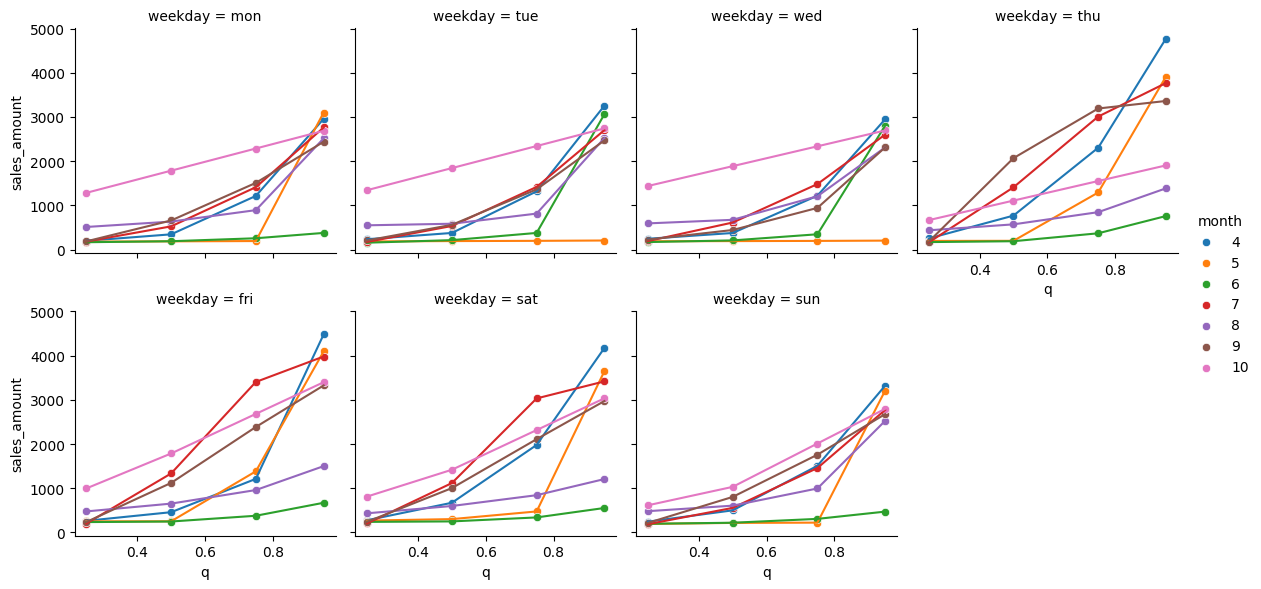

In [25]:
g = sns.FacetGrid(cnt_q, col = 'weekday', hue = 'month', col_wrap = 4)
g.map(sns.lineplot, 'q','sales_amount')
g.map(sns.scatterplot, 'q','sales_amount')
g.add_legend()
plt.show()

# Iterators

In [26]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [27]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [29]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}